In [1]:
from utils.SD_gen import generator 
from PIL import Image
from io import BytesIO
import base64

In [2]:
SD = generator()
results=SD("hardcore biker barbie --ar 2:3")

820 546
hardcore biker barbie 
API Call
Recived


In [3]:
results["images"]

['iVBORw0KGgoAAAANSUhEUgAAAiAAAAMwCAIAAACWSkxkAAAAyHRFWHRwYXJhbWV0ZXJzAGhhcmRjb3JlIGJpa2VyIGJhcmJpZSAKU3RlcHM6IDIwLCBTYW1wbGVyOiBFdWxlciwgQ0ZHIHNjYWxlOiA3LjAsIFNlZWQ6IDI5NDA4ODI1ODQsIFNpemU6IDU0Nng4MjAsIE1vZGVsIGhhc2g6IDZjZTAxNjE2ODksIE1vZGVsOiB2MS01LXBydW5lZC1lbWFvbmx5LCBEZW5vaXNpbmcgc3RyZW5ndGg6IDAsIFZlcnNpb246IHYxLjUuMdbzHogAAQAASURBVHicPP1bkyxJcp0LLr2YmUdE7kvtqr6j0QAJAkMeyAhlRmTO+QXz9+cHUGTmHJAEulGXfcnMCHczVV3z4Nl8qJeS2rsyMszNVZd+a6n81//jT/T5u9//GqYC6DATVfHetso5Yz32OS5jHvux77kyQipLBJU1H6/uHaXJUHUQqlYsAdV4vd3MG82PY+bcoaw5m0smrV2l9YzqTqiqupD7Y398fSHFRj9moFgUcwMrI5qJmWRmJkglwOLjfldoa62Csebt3U1Hr1wMQs1bK3Due6zlzZGkUE0y4nLZvLft0rfrsAFUsRZZ6wht7f6yH4+9tc163259P46MZabmcrkMASoYWcdxtKbm1noXsfvzcxyrUlcwFyuWCMZljOtluz55G7Vqrdj3x/7yvGJlrdbbPFIgVaWq3txdxaxIsMxMRJEVydevryiKEGBmkvL0flyers03b86I63WYO1D9Mnpvl+t4PL98/ssv9z1e7ut+XyqcK8wgIr0PdS1SRd69u5iPmPXy5eX+eG1mRFxu/enTp3cf323bGFvLtfbH7H75y59/2ue89tvzl18ipokmod1dqZDX+/F4XfMREAB0E292+9WnP/3jf3nXr59//nG/v+bj+dI0E9enp4z4+PTu3Q8//PlfP2cKA4/HY1yeXM3atr

In [4]:
images=results["images"].copy()
for i,image in enumerate(images):
    image = BytesIO(base64.decodebytes(image.encode("utf-8")))
    images[i]=image


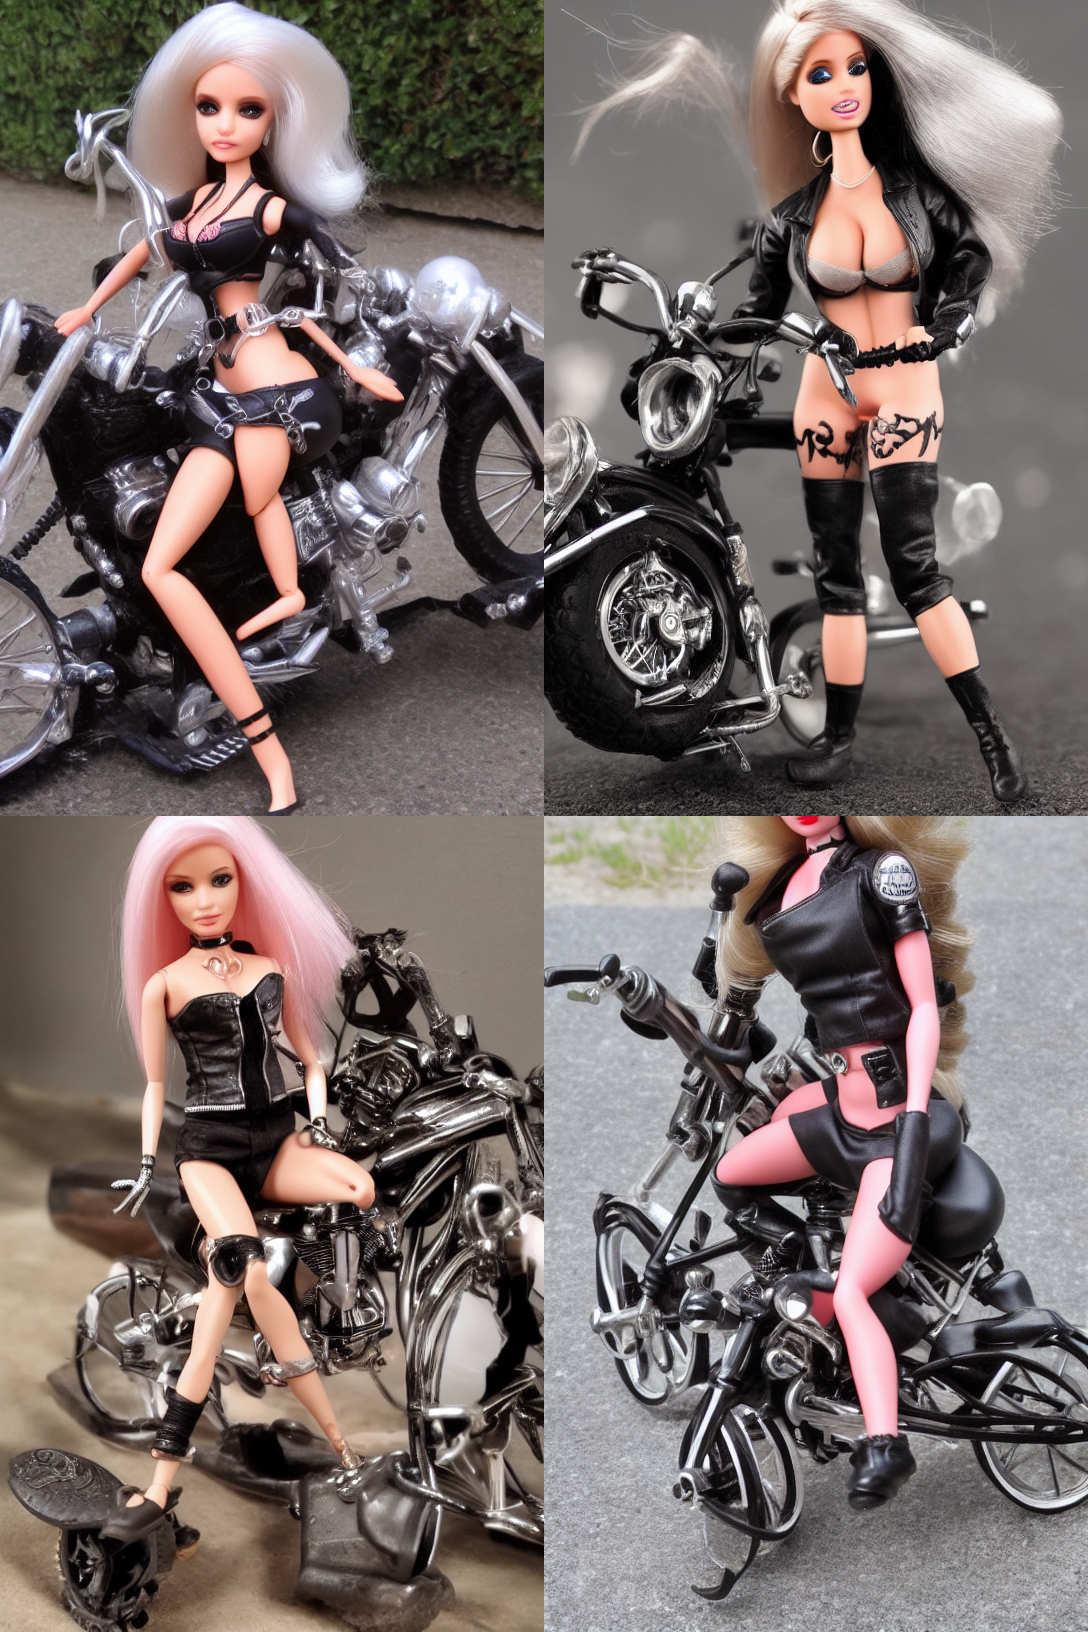

In [6]:
def combine_images(images):
    # Create a blank canvas for the final grid image
    grid_image = Image.new('RGB', (2 * images[0].width, 2 * images[0].height))

    # Iterate over each image and paste it onto the grid
    for i in range(2):
        for j in range(2):
            # Calculate the coordinates to paste the image
            x = j * images[0].width
            y = i * images[0].height

            # Paste the image onto the grid
            grid_image.paste(images[i*2 + j], (x, y))
    
    return grid_image
images=[Image.open(image) for image in images]
combine_images(images)